In [2]:
import torch
import torchvision
import torchvision.models as models
import torch.nn as nn
import numpy as np
from torchvision import transforms, datasets
from sklearn import metrics
import time
import copy
import os
import random
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import glob
from pathlib import Path
import PIL
import math
import sys
from wilds import get_dataset
from wilds.datasets.wilds_dataset import WILDSSubset
from wilds.common.data_loaders import get_train_loader, get_eval_loader
import torchvision.transforms as transforms
from wilds.common.grouper import CombinatorialGrouper
from sklearn.model_selection import train_test_split
from collections import Counter
import tensorflow as tf

In [13]:
from localutils.plotters import boundingBox2


import json
with open('./data/islands/metadata.json') as f:
    metadata_full = json.load(f)

for i in range(len(metadata_full['images'])):
    metadata_full['images'][i]['image_id'] = metadata_full['images'][i].pop('id')

from operator import itemgetter 
from itertools import groupby

my_id = itemgetter('image_id')
merged_dicts = []

for k, v in groupby(sorted((metadata_full['annotations'] + metadata_full['images']), key=my_id), key=my_id):
    merged_dicts.append({key:val for d in v for key, val in d.items()})

metadata = [i for i in merged_dicts if i['category_id'] != 1] # removing humans

In [14]:
basepath = './data/islands/images/images/'


['empty', 'human', 'fox', 'skunk', 'rodent', 'bird', 'other']

In [15]:
cats = {i["id"]:i['name'] for i in metadata_full['categories']}

In [34]:
# checking if file exists:
from os.path import exists
ne = []
i = 0
for img in metadata: 
    if not exists(basepath + img['file_name']):
        ne.append(img)
        i += 1
print("{} images do not exist".format(i))

remove_seq = set([n.get('seq_id') for n in ne])
cnt = len(metadata)
metadata = [i for i in metadata if i.get('seq_id') not in remove_seq]
print("{} images removed with overlapping sequences from previous cell".format(cnt - len(metadata)))

20 images do not exist


In [56]:
remove_seq = set([n.get('seq_id') for n in ne])
cnt = len(metadata)
metadata = [i for i in metadata if i.get('seq_id') not in remove_seq]
print("{} images removed with overlapping sequences from previous cell".format(cnt - len(metadata)))

0 images removed with overlapping sequences from previous cell


In [54]:
len(metadata)

239949

c:\Projects\wild\localutils\plotters.py:58: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


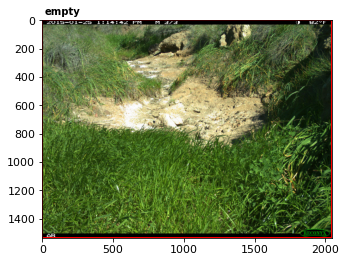

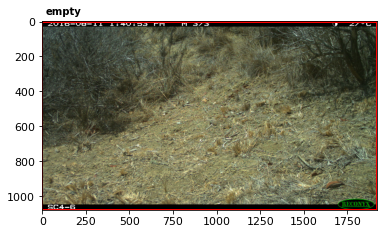

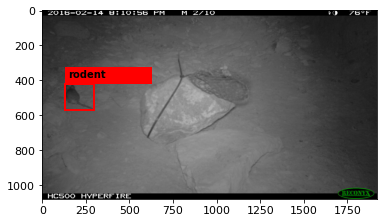

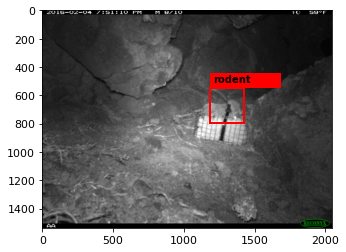

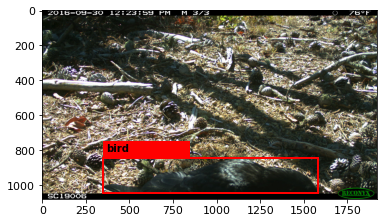

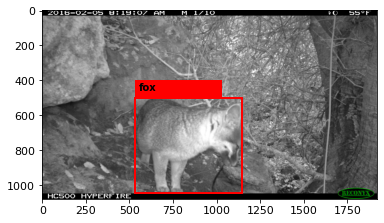

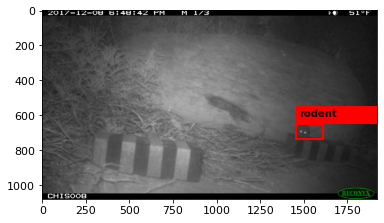

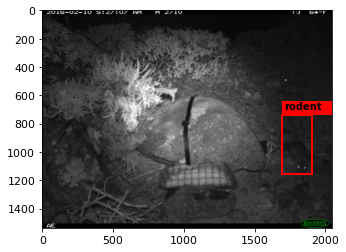

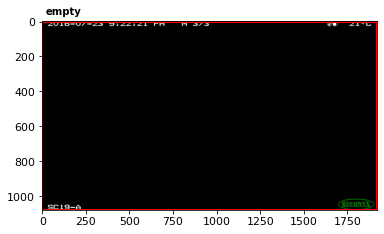

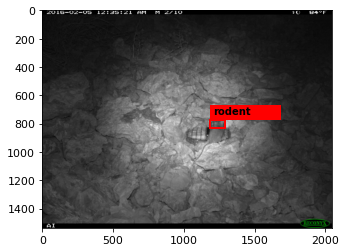

In [25]:
istart = random.randint(0,20000)
for i in range(20, 30):
    # boundingBox2(basepath + merged_dicts[i]['file_name'], merged_dicts[i]['bbox'], label=cats.get(merged_dicts[i]['category_id']))
    try:
        boundingBox2(basepath + metadata[i]['file_name'], metadata[i]['bbox'], label=cats.get(metadata[i]['category_id']))
    except:
        print(i) #TODO check why some don't work... (e.g. i=20)

# YOLO test

In [18]:
# img = tf.keras.utils.load_img(basepath + metadata[30]['file_name'], target_size=[224, 224])
img = tf.keras.utils.load_img(basepath + 'loc-h500ee07133326/008/603.jpg', target_size=[224, 224])

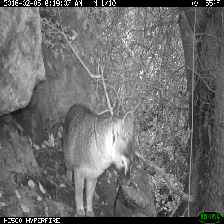

In [19]:
img

In [21]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5n6') 

Using cache found in C:\Users\jakob/.cache\torch\hub\ultralytics_yolov5_master
requirements: requests>=2.23.0 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'requests>=2.23.0' ' returned non-zero exit status 1.
YOLOv5  2022-5-19 Python-3.10.1 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce GTX 1070, 8192MiB)



  0%|          | 0.00/6.86M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5n6 summary: 280 layers, 3239884 parameters, 0 gradients
Adding AutoShape... 
